In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMAGE_PATH = 'piova_night.png'

In [3]:
img = cv2.imread(IMAGE_PATH, cv2.IMREAD_COLOR) / 255.0
img = img[...,::-1]

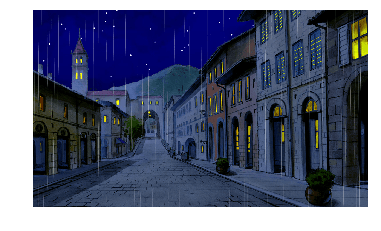

In [4]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
# Convolutions are applied independently on each channel so there's no need to convert back to BRG
blur_filter = np.ones((9, 9))/81
blur_image = cv2.filter2D(img, -1, blur_filter)
np.round(blur_filter, 3)

array([[0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012],
       [0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012],
       [0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012],
       [0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012],
       [0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012],
       [0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012],
       [0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012],
       [0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012],
       [0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


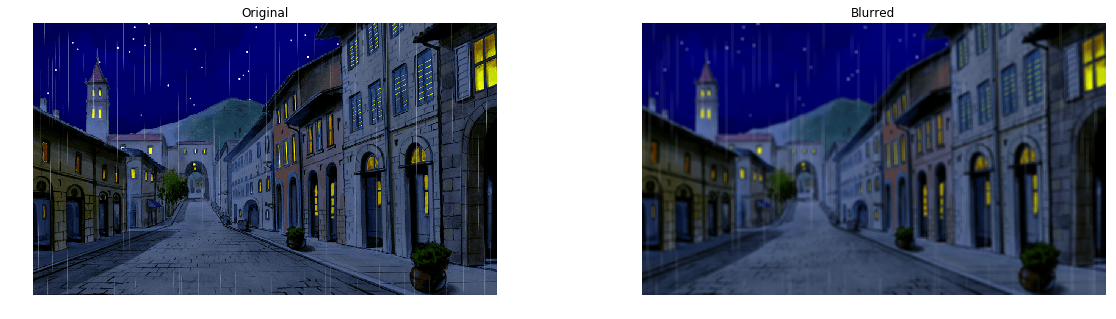

In [6]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Blurred')
plt.imshow(blur_image)
plt.axis('off')
plt.show()

In [7]:
edge_filter = np.full((9, 9), -1)
edge_filter[edge_filter.shape[0]//2, edge_filter.shape[0]//2] = np.product(edge_filter.shape) - 1
edge_image = cv2.filter2D(img, -1, edge_filter)
edge_filter

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, 80, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


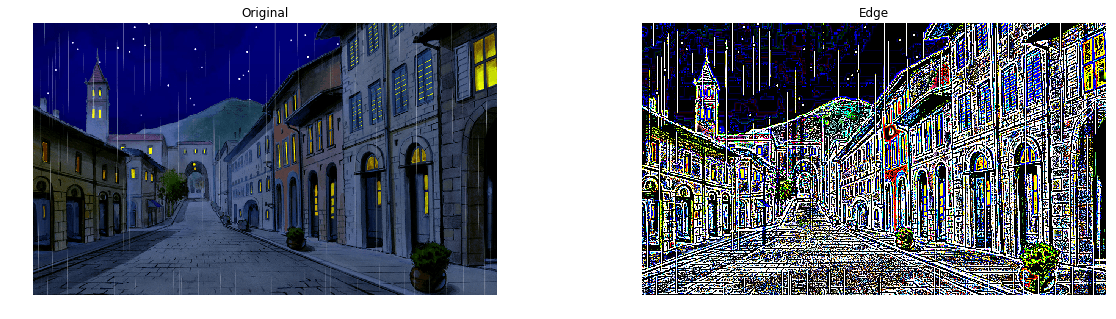

In [8]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Edge')
plt.imshow(edge_image)
plt.axis('off')
plt.show()

In [9]:
sharpen_filter = np.zeros((5, 5), dtype=int)
sharpen_filter[sharpen_filter.shape[0]//2, :] = -1
sharpen_filter[:, sharpen_filter.shape[1]//2] = -1
sharpen_filter[sharpen_filter.shape[0]//2, sharpen_filter.shape[0]//2] = np.sum(sharpen_filter.shape) - 1
sharpen_image = cv2.filter2D(img, -1, sharpen_filter)
sharpen_filter

array([[ 0,  0, -1,  0,  0],
       [ 0,  0, -1,  0,  0],
       [-1, -1,  9, -1, -1],
       [ 0,  0, -1,  0,  0],
       [ 0,  0, -1,  0,  0]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


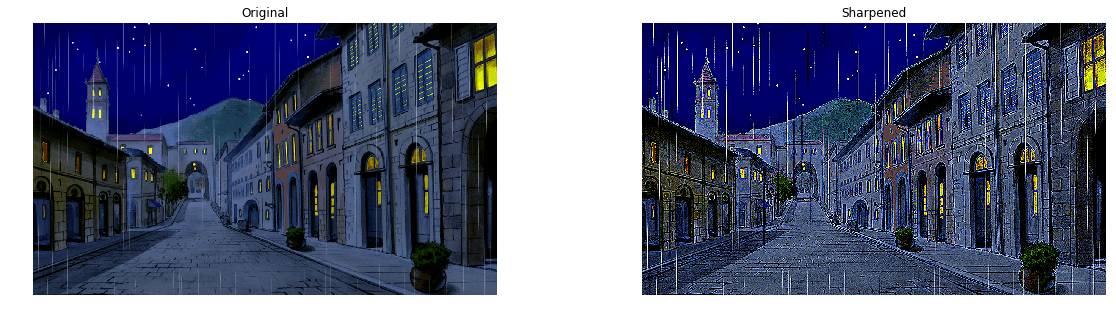

In [10]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Sharpened')
plt.imshow(sharpen_image)
plt.axis('off')
plt.show()